# L03.1 Linear Regression Practice

In [1]:
import torch

x = torch.tensor([[1, 2, 3],[4, 5, 6], [7, 8, 9]])
print(x.type())
print(x)

torch.LongTensor
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])


In [2]:
print(x.size())
print(x.shape)
print(x.ndimension())

torch.Size([3, 3])
torch.Size([3, 3])
2


In [3]:
y = torch.FloatTensor([[[1, 2], [3, 4]], [[5, 6], [7, 8]], [[1, 2], [3, 4]]])
print(y.shape)
print(y.ndimension()) # == len(y.shape)

torch.Size([3, 2, 2])
3


In [4]:
print(y)
print("origianl shape: ", y.shape)

y0 =y.unsqueeze(0)
print(y0)
print("unsqueeze(0): ", y0.shape)

tensor([[[1., 2.],
         [3., 4.]],

        [[5., 6.],
         [7., 8.]],

        [[1., 2.],
         [3., 4.]]])
origianl shape:  torch.Size([3, 2, 2])
tensor([[[[1., 2.],
          [3., 4.]],

         [[5., 6.],
          [7., 8.]],

         [[1., 2.],
          [3., 4.]]]])
unsqueeze(0):  torch.Size([1, 3, 2, 2])


In [5]:
x = torch.FloatTensor([[[1, 2], [3, 4]], [[5, 6], [7, 8]], [[1, 2], [3, 4]]])

x0 = x.unsqueeze(0) # [3, 2, 2] --> [1, 3, 2, 2]
x1 = x.unsqueeze(1) # [3, 2, 2] --> [3, 1, 2, 2]
x2 = x.unsqueeze(2) # [3, 2, 2] --> [3, 2, 1, 2]
x3 = x.unsqueeze(3) # [3, 2, 2] --> [3, 2, 2, 1]

print(x0)
print(x1)
print(x2)
print(x3)

tensor([[[[1., 2.],
          [3., 4.]],

         [[5., 6.],
          [7., 8.]],

         [[1., 2.],
          [3., 4.]]]])
tensor([[[[1., 2.],
          [3., 4.]]],


        [[[5., 6.],
          [7., 8.]]],


        [[[1., 2.],
          [3., 4.]]]])
tensor([[[[1., 2.]],

         [[3., 4.]]],


        [[[5., 6.]],

         [[7., 8.]]],


        [[[1., 2.]],

         [[3., 4.]]]])
tensor([[[[1.],
          [2.]],

         [[3.],
          [4.]]],


        [[[5.],
          [6.]],

         [[7.],
          [8.]]],


        [[[1.],
          [2.]],

         [[3.],
          [4.]]]])


In [6]:
xt = x.unsqueeze(0).unsqueeze(1).unsqueeze(0).unsqueeze(5) # 1, 1, 1, 3, 2, 1, 2
print(xt.squeeze().shape)

torch.Size([3, 2, 2])


In [7]:
x.view(3, -1)

tensor([[1., 2., 3., 4.],
        [5., 6., 7., 8.],
        [1., 2., 3., 4.]])

In [8]:
x = torch.FloatTensor([[1, 2], [3, 4], [5, 6]]) # 3 x 2
w = torch.rand(1, 2, dtype=torch.float)  # 2 x 1
b = torch.rand(3, 1, dtype=torch.float)

print(x @ w.T + b)

tensor([[3.0155],
        [5.5607],
        [9.1829]])


In [9]:
w = torch.tensor(4.0, requires_grad=True)
a = w*3
l = a**2
l.backward()
print(w.grad)

tensor(72.)


## Linear Regression 실습

In [10]:
import torch

x_train = torch.FloatTensor([[1, 2], [3, 2], [3, 7], [1, 1], [1, 0]])
y_train = torch.FloatTensor([[4], [8], [23], [1], [-2]])

W = torch.randn(2, 1)
b = torch.randn(1, 1)
print(W, b)

lr = 0.01

for epoch in range(3001):
    W.requires_grad_(True)
    b.requires_grad_(True)

    h = x_train @ W + b
    cost = ((y_train - h)**2).mean()

    cost.backward()

    with torch.no_grad():
        W = W - lr * W.grad
        b = b - lr * b.grad

        if epoch % 100 == 0:
            print(f'Epoch {epoch}: Cost = {cost.item()}, W = {W.squeeze().tolist()}, b = {b.squeeze().item()}')


tensor([[ 1.6212],
        [-1.0627]]) tensor([[-0.5556]])
Epoch 0: Cost = 150.5323028564453, W = [2.0165417194366455, -0.2400374412536621], b = -0.4158027768135071
Epoch 100: Cost = 0.8111913800239563, W = [1.2574418783187866, 2.984672784805298], b = -2.1462292671203613
Epoch 200: Cost = 0.3320358395576477, W = [1.302392840385437, 3.1093032360076904], b = -2.7852845191955566
Epoch 300: Cost = 0.16955049335956573, W = [1.4811729192733765, 3.0919857025146484], b = -3.1421332359313965
Epoch 400: Cost = 0.08712118119001389, W = [1.6259409189224243, 3.0674870014190674], b = -3.3864777088165283
Epoch 500: Cost = 0.04477297514677048, W = [1.7316036224365234, 3.0485548973083496], b = -3.5603432655334473
Epoch 600: Cost = 0.023009853437542915, W = [1.8075642585754395, 3.034827947616577], b = -3.6848363876342773
Epoch 700: Cost = 0.011825117282569408, W = [1.8620431423187256, 3.024970293045044], b = -3.7740676403045654
Epoch 800: Cost = 0.006077134981751442, W = [1.9011012315750122, 3.017900705

In [11]:
x_test = torch.FloatTensor([[5, 10], [2, 7], [3, 10]])

y_test = x_test @ W + b
print(y_test)

tensor([[35.9999],
        [21.0001],
        [32.0000]])


## Linear Regression with Scikit-learn

In [12]:
from sklearn.linear_model import LinearRegression

x = [[1, 2], [3, 2], [3 ,7], [1, 1], [1, 0]]
y = [[4], [8], [23], [1], [-2]]

lr = LinearRegression() # 모델 생성
lr.fit(x, y) # 학습 (피팅)

print(lr.coef_, lr.intercept_)

[[2. 3.]] [-4.]


In [13]:
x_test = [[5, 10], [2, 7], [10, 3]]
y_test = lr.predict(x_test)
print(y_test)

[[36.]
 [21.]
 [25.]]


# L04.1 Logistic Regression Practice

In [14]:
import torch

x_train = torch.FloatTensor([[1], [2], [3], [4], [5], [2.5], [3.5], [0], [3.1], [2.7], [2.8], [2.9]])
y_train = torch.FloatTensor([[1],[1],[1],[0],[0],[0],[0],[1],[0],[1],[1],[1]])

In [15]:
import math

w = torch.randn(1, 1)
b = torch.randn(1, 1)

lr = 1.0

for epoch in range(2001):
    w.requires_grad_(True)
    b.requires_grad_(True)

    h = torch.sigmoid(x_train @ w + b)
    #h = 1 / (1 + math.e ** (-(x_train @ w + b)))

    cost = torch.mean(-y_train * torch.log(h) - (1-y_train) * torch.log(1-h))  # BCE

    cost.backward()

    with torch.no_grad():
        w = w - lr * w.grad
        b = b - lr * b.grad

        if epoch % 100 == 0:
            print(f'Epoch {epoch}: Cost = {cost.item()}, W = {w.squeeze().tolist()}, b = {b.squeeze().item()}')

Epoch 0: Cost = 1.684381365776062, W = 0.29679399728775024, b = -0.5576716661453247
Epoch 100: Cost = 0.42231765389442444, W = -1.4192560911178589, b = 4.308471202850342
Epoch 200: Cost = 0.3993443548679352, W = -1.8807520866394043, b = 5.720011234283447
Epoch 300: Cost = 0.39109599590301514, W = -2.1624886989593506, b = 6.573801040649414
Epoch 400: Cost = 0.3871525228023529, W = -2.3587496280670166, b = 7.165768623352051
Epoch 500: Cost = 0.3850063979625702, W = -2.504127025604248, b = 7.6030073165893555
Epoch 600: Cost = 0.3837484121322632, W = -2.615719795227051, b = 7.937989711761475
Epoch 700: Cost = 0.38297465443611145, W = -2.7033843994140625, b = 8.200782775878906
Epoch 800: Cost = 0.3824829161167145, W = -2.773369312286377, b = 8.410362243652344
Epoch 900: Cost = 0.3821626603603363, W = -2.8299002647399902, b = 8.579521179199219
Epoch 1000: Cost = 0.3819502890110016, W = -2.875969886779785, b = 8.717293739318848
Epoch 1100: Cost = 0.38180744647979736, W = -2.9137661457061768, 

In [16]:
bce = torch.nn.BCELoss()

w = torch.randn(1, 1)
b = torch.randn(1, 1)

lr = 1.0

for epoch in range(2001):
    w.requires_grad_(True)
    b.requires_grad_(True)

    h = torch.sigmoid(x_train @ w + b)

    cost = bce(h, y_train)
    cost.backward()

    with torch.no_grad():
        w = w - lr * w.grad
        b = b - lr * b.grad

        if epoch % 100 == 0:
            print(f'Epoch {epoch}: Cost = {cost.item()}, W = {w.squeeze().tolist()}, b = {b.squeeze().item()}')

Epoch 0: Cost = 0.8460483551025391, W = -0.4619423747062683, b = -0.13109292089939117
Epoch 100: Cost = 0.42047008872032166, W = -1.447409987449646, b = 4.3950090408325195
Epoch 200: Cost = 0.3987967073917389, W = -1.896276593208313, b = 5.7671966552734375
Epoch 300: Cost = 0.3908538520336151, W = -2.1728758811950684, b = 6.6051836013793945
Epoch 400: Cost = 0.38702622056007385, W = -2.366278886795044, b = 7.188438892364502
Epoch 500: Cost = 0.38493427634239197, W = -2.50982928276062, b = 7.620137691497803
Epoch 600: Cost = 0.38370481133461, W = -2.62015962600708, b = 7.951305866241455
Epoch 700: Cost = 0.3829473555088043, W = -2.706906795501709, b = 8.211335182189941
Epoch 800: Cost = 0.3824652135372162, W = -2.776202440261841, b = 8.418843269348145
Epoch 900: Cost = 0.3821509778499603, W = -2.832200765609741, b = 8.586403846740723
Epoch 1000: Cost = 0.38194242119789124, W = -2.877850294113159, b = 8.722914695739746
Epoch 1100: Cost = 0.38180220127105713, W = -2.9153144359588623, b = 

In [17]:
x_test = torch.FloatTensor([[4.5],[1.1]])

#test_result = torch.sigmoid(torch.mm(x_test, w) + b)
test_result = torch.sigmoid(x_test @ w + b)

print(test_result)

tensor([[0.0109],
        [0.9973]])


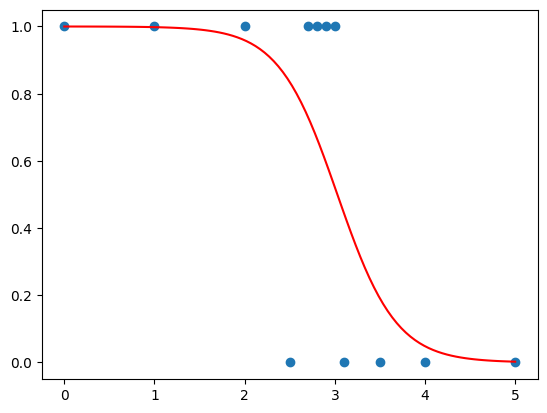

In [18]:
import matplotlib.pyplot as plt

X = torch.linspace(0, 5, 100).unsqueeze(1)
Y = torch.sigmoid(X@w + b)

plt.scatter(x_train, y_train)
plt.plot(X, Y, c='red')
plt.show()

In [19]:
bce = torch.nn.BCELoss()

w = torch.randn(1, 1, requires_grad=True)
b = torch.randn(1, 1, requires_grad=True)

optimizer = torch.optim.Adam([w, b], lr=1.0)

for epoch in range(2001):

    h = torch.sigmoid(x_train @ w + b)
    cost = bce(h, y_train)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    with torch.no_grad():
        if epoch % 100 == 0:
            print(f'Epoch {epoch}: Cost = {cost.item()}, W = {w.squeeze().tolist()}, b = {b.squeeze().item()}')

Epoch 0: Cost = 0.7806791663169861, W = 1.0136308670043945, b = 0.4170365333557129
Epoch 100: Cost = 0.3822995126247406, W = -2.815603733062744, b = 8.524229049682617
Epoch 200: Cost = 0.38150203227996826, W = -3.06817364692688, b = 9.291478157043457
Epoch 300: Cost = 0.3814907371997833, W = -3.1019155979156494, b = 9.391989707946777
Epoch 400: Cost = 0.3814908564090729, W = -3.103821277618408, b = 9.397658348083496
Epoch 500: Cost = 0.3814908266067505, W = -3.103851556777954, b = 9.397749900817871
Epoch 600: Cost = 0.3814907371997833, W = -3.103851795196533, b = 9.397749900817871
Epoch 700: Cost = 0.3814907371997833, W = -3.1038520336151123, b = 9.397749900817871
Epoch 800: Cost = 0.3814908266067505, W = -3.103851556777954, b = 9.397749900817871
Epoch 900: Cost = 0.3814907371997833, W = -3.103851795196533, b = 9.397749900817871
Epoch 1000: Cost = 0.3814907371997833, W = -3.103851795196533, b = 9.397749900817871
Epoch 1100: Cost = 0.3814907371997833, W = -3.103851795196533, b = 9.39774

## sklearn에서LogisticRegression사용

In [20]:
from sklearn.linear_model import LogisticRegression

x_train = [[1],[2],[3],[4],[5],[2.5],[3.5],[0],[3.1],[2.7],[2.8],[2.9]]
y_train = [1,1,1,0,0,0,0,1,0,1,1,1] 

model = LogisticRegression(penalty=None)
model.fit(x_train,y_train)

print(model.coef_, model.intercept_)

x_test = [[4.5], [1.1]]
test_result = model.predict(x_test)
print(test_result)



[[-3.10428163]] [9.39919938]
[0 1]


# L06.1 Softmax Regression Practice

In [30]:
import torch
x_train = torch.FloatTensor([ [1,2,1,1], [2,1,3,2], [3,1,3,4], [4,1,5,5], [1,7,5,5],[1,2,5,6], [1,6,6,6], [1,7,7,7] ])
y_train = torch.FloatTensor([ [0,0,1], [0,0,1], [0,0,1], [0,1,0], [0,1,0], [0,1,0], [1,0,0], [1,0,0] ])

In [31]:
W = torch.randn(4, 3, requires_grad=True)
b = torch.randn(1, 3, requires_grad=True)
print(W)
print(b)

optimizer = torch.optim.Adam([W, b], lr=0.1)

tensor([[-1.4742, -0.3879,  0.3331],
        [-1.7264, -0.9668,  0.6214],
        [-0.9171,  0.1999, -0.8467],
        [-1.5838,  1.7563,  0.0731]], requires_grad=True)
tensor([[-0.8060,  0.7452, -0.2738]], requires_grad=True)


In [32]:
for epoch in range(3001):
    h = torch.softmax(torch.mm(x_train, W)+b, dim=1)
    cost = -torch.mean(torch.sum(y_train * torch.log(h), dim=1))  # dim은 가로를 1로 할 것인지 세로를 1로 할 것인지 결정함

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    with torch.no_grad():
        if epoch % 100 == 0:
            print("epoch: {}, cost: {:.6f}".format(epoch, cost.item()))

epoch: 0, cost: 10.677729
epoch: 100, cost: 0.361586
epoch: 200, cost: 0.263240
epoch: 300, cost: 0.197887
epoch: 400, cost: 0.152961
epoch: 500, cost: 0.121566
epoch: 600, cost: 0.098918
epoch: 700, cost: 0.082033
epoch: 800, cost: 0.069085
epoch: 900, cost: 0.058923
epoch: 1000, cost: 0.050792
epoch: 1100, cost: 0.044184
epoch: 1200, cost: 0.038739
epoch: 1300, cost: 0.034200
epoch: 1400, cost: 0.030378
epoch: 1500, cost: 0.027129
epoch: 1600, cost: 0.024346
epoch: 1700, cost: 0.021943
epoch: 1800, cost: 0.019856
epoch: 1900, cost: 0.018031
epoch: 2000, cost: 0.016427
epoch: 2100, cost: 0.015010
epoch: 2200, cost: 0.013752
epoch: 2300, cost: 0.012631
epoch: 2400, cost: 0.011627
epoch: 2500, cost: 0.010726
epoch: 2600, cost: 0.009913
epoch: 2700, cost: 0.009179
epoch: 2800, cost: 0.008513
epoch: 2900, cost: 0.007907
epoch: 3000, cost: 0.007355


In [24]:
W.requires_grad_(False)
b.requires_grad_(False)

x_test = torch.FloatTensor([[1,11,10,9], [1,3,4,3], [1,1,0,1]])
test_all = torch.softmax(torch.mm(x_test, W)+b, dim=1)
print(test_all)
print(torch.argmax(test_all, dim=1))

tensor([[1.0000e+00, 2.7023e-17, 1.7591e-35],
        [6.2918e-03, 8.5004e-01, 1.4367e-01],
        [4.4188e-31, 3.7758e-11, 1.0000e+00]])
tensor([0, 1, 2])


In [34]:
a = torch.tensor([[1, 3, 2, 6, 4], [7, 2, 3, 9, 8]], dtype=torch.float)
torch.argmax(a, dim=1)

tensor([3, 3])

In [39]:
import torch.nn.functional as F
import torch

x_train = torch.FloatTensor([[1,2,1,1], [2,1,3,2], [3,1,3,4], [4,1,5,5], [1,7,5,5], [1,2,5,6], [1,6,6,6], [1,7,7,7]])
y_train = torch.LongTensor([2,2,2,1,1,1,0,0])

W = torch.randn(4, 3 ,requires_grad=True)  
b = torch.randn(1, 3, requires_grad=True)

optimizer = torch.optim.Adam([W, b], lr=0.1)

for epoch in range(3001):
    h = torch.mm(x_train, W) + b
    cost = F.cross_entropy(h, y_train)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    with torch.no_grad():
        if epoch % 100 == 0:
            print("epoch: {}, cost: {:.6f}".format(epoch, cost.item()))


epoch: 0, cost: 10.404158
epoch: 100, cost: 0.372091
epoch: 200, cost: 0.262537
epoch: 300, cost: 0.190108
epoch: 400, cost: 0.143506
epoch: 500, cost: 0.112316
epoch: 600, cost: 0.090360
epoch: 700, cost: 0.074244
epoch: 800, cost: 0.062029
epoch: 900, cost: 0.052537
epoch: 1000, cost: 0.045011
epoch: 1100, cost: 0.038946
epoch: 1200, cost: 0.033986
epoch: 1300, cost: 0.029881
epoch: 1400, cost: 0.026445
epoch: 1500, cost: 0.023543
epoch: 1600, cost: 0.021068
epoch: 1700, cost: 0.018942
epoch: 1800, cost: 0.017103
epoch: 1900, cost: 0.015501
epoch: 2000, cost: 0.014098
epoch: 2100, cost: 0.012862
epoch: 2200, cost: 0.011768
epoch: 2300, cost: 0.010795
epoch: 2400, cost: 0.009927
epoch: 2500, cost: 0.009148
epoch: 2600, cost: 0.008448
epoch: 2700, cost: 0.007815
epoch: 2800, cost: 0.007243
epoch: 2900, cost: 0.006723
epoch: 3000, cost: 0.006250


In [40]:
import torch.nn as nn

x_train = torch.FloatTensor([[1,2,1,1], [2,1,3,2], [3,1,3,4], [4,1,5,5], [1,7,5,5], [1,2,5,6], [1,6,6,6], [1,7,7,7]])
y_train = torch.LongTensor([2,2,2,1,1,1,0,0])

model = nn.Linear(4, 3) # 입력: 4차원, 클래스 개수: 3개
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

for epoch in range(3001):
    h = model(x_train)
    cost = F.cross_entropy(h, y_train)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    with torch.no_grad():
        if epoch % 100 == 0:
            print("epoch: {}, cost: {:.6f}".format(epoch, cost.item()))

epoch: 0, cost: 2.425158
epoch: 100, cost: 0.319835
epoch: 200, cost: 0.194931
epoch: 300, cost: 0.129679
epoch: 400, cost: 0.092538
epoch: 500, cost: 0.069399
epoch: 600, cost: 0.053990
epoch: 700, cost: 0.043206
epoch: 800, cost: 0.035360
epoch: 900, cost: 0.029470
epoch: 1000, cost: 0.024932
epoch: 1100, cost: 0.021360
epoch: 1200, cost: 0.018496
epoch: 1300, cost: 0.016162
epoch: 1400, cost: 0.014234
epoch: 1500, cost: 0.012623
epoch: 1600, cost: 0.011261
epoch: 1700, cost: 0.010100
epoch: 1800, cost: 0.009101
epoch: 1900, cost: 0.008235
epoch: 2000, cost: 0.007480
epoch: 2100, cost: 0.006817
epoch: 2200, cost: 0.006232
epoch: 2300, cost: 0.005713
epoch: 2400, cost: 0.005251
epoch: 2500, cost: 0.004837
epoch: 2600, cost: 0.004465
epoch: 2700, cost: 0.004130
epoch: 2800, cost: 0.003827
epoch: 2900, cost: 0.003552
epoch: 3000, cost: 0.003302


In [42]:
for a in model.parameters():
    print(a)

Parameter containing:
tensor([[-18.7836,  -0.9238,  13.0564,  -3.3200],
        [  3.7991,  -0.0686,  -0.8083,   1.6024],
        [  5.3276,   0.2555,  -6.5349,   0.1571]], requires_grad=True)
Parameter containing:
tensor([-27.2885,  -6.1013,  17.5326], requires_grad=True)


In [43]:
import numpy as np
from sklearn.linear_model import LogisticRegression

x_train = np.array([ [1,2,1,1], [2,1,3,2], [3,1,3,4], [4,1,5,5], [1,7,5,5], [ 1,2,5,6], [1,6,6,6], [1,7,7,7] ])
 # y에 0, 1, 2 등 둘 이상의 class가 존재 => softmax regression
y_train = np.array([ 2, 2, 2, 1, 1, 1, 0, 0 ])

logistic = LogisticRegression() # 모델 생성
logistic.fit(x_train, y_train) # 학습

pred = logistic.predict([[1,11,10,9], [1,3,4,3], [1,1,0,1]])
print(pred)

[0 2 2]
